**Part 1: Data Preprocessing**

Load the Dataset

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('/content/Netflix_Userbase.csv')

Missing Values

In [ ]:
print(data.isnull().sum())

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64


Encode Categorical Values

In [ ]:
data_encoded = pd.get_dummies(data, columns=[ 'Subscription Type', 'Join Date', 'Last Payment Date', 'Country', 'Gender', 'Plan Duration'])
data_dummies = pd.get_dummies(data, drop_first = True)
print(data_encoded)

      User ID  Monthly Revenue  Age      Device  Subscription Type_Basic  \
0           1               10   28  Smartphone                     True   
1           2               15   35      Tablet                    False   
2           3               12   42    Smart TV                    False   
3           4               12   51      Laptop                    False   
4           5               10   33  Smartphone                     True   
...       ...              ...  ...         ...                      ...   
2495     2496               14   28    Smart TV                    False   
2496     2497               15   33    Smart TV                     True   
2497     2498               12   38      Laptop                    False   
2498     2499               13   48      Tablet                    False   
2499     2500               15   35    Smart TV                     True   

      Subscription Type_Premium  Subscription Type_Standard  \
0                       

Feature Selection


In [ ]:
data_dummies = pd.get_dummies(data, drop_first=True)
data_dummies['Model'] = (data['Monthly Revenue'] > 10).astype(int)

x = data_dummies.drop(['Age', 'Monthly Revenue'], axis=1)
y = data_dummies['Model']

- The monthly revenue is a good choice for a dependent variable, as it is the output of all the other factors. It's the results, it's the indicator if a business is performing well. Like how they can easily tell if their business decision or their is a downward trend in their earnings based from their revenue, and in this way, they can easily identify which factors to influence when looking at all the overall dataset. A business should aim for maximizing their revenue.

**Part 2: Exploratory Data Analysis (EDA)**

Descriptive Statistics

In [ ]:
data.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


Visualizations

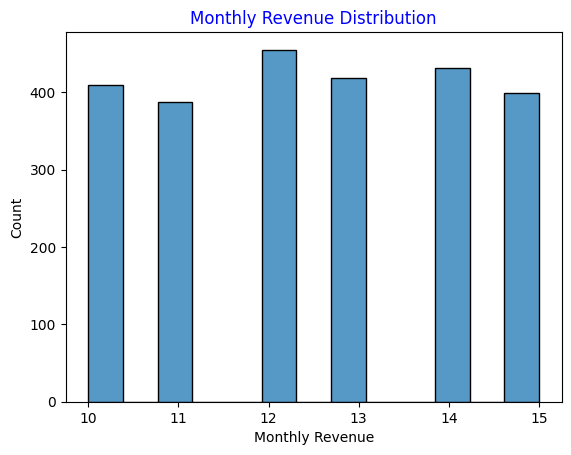

In [ ]:
sns.histplot(data = data, x='Monthly Revenue', multiple='stack')
plt.title('Monthly Revenue Distribution', color = 'blue')
plt.show()

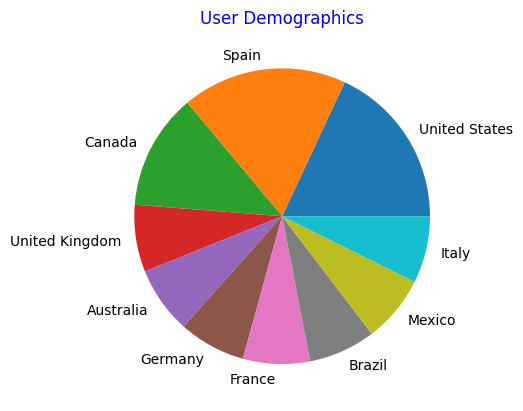

In [ ]:
data.Country.value_counts().plot(kind="pie")
plt.title('User Demographics', color = 'blue')
plt.axis('off')
plt.show()

**Part 3: Linear Regression Model (Predicting Monthly Revenue)**

Build the Model

In [ ]:
x = data.drop('Monthly Revenue', axis=1)
y = data[['Age']]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

model1 = LinearRegression()

Slope [-0.00497304]
Intercept [12.70133211]


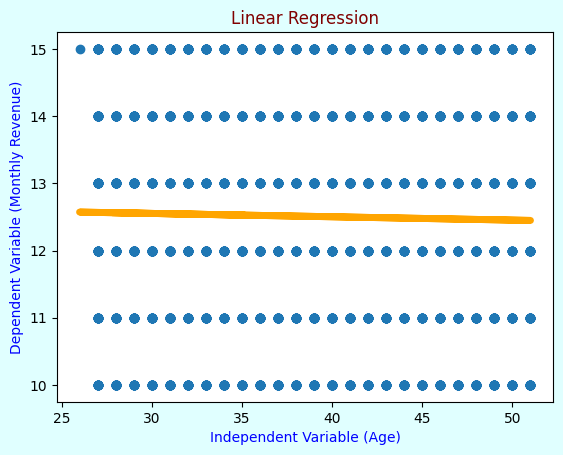

In [ ]:
x = data[['Age']]
y = data[['Monthly Revenue']]

model1 = LinearRegression()
model1.fit(x,y)

slope = model1.coef_[0]
intercept = model1.intercept_
print("Slope", slope)
print("Intercept", intercept)

plt.figure(facecolor = 'lightcyan')
plt.scatter(x,y)
plt.plot(x, model1.predict(x), color = 'orange', linewidth = 5)
plt.xlabel('Independent Variable (Age)', color = 'blue')
plt.ylabel('Dependent Variable (Monthly Revenue)', color = 'blue')
plt.title('Linear Regression', color = 'maroon')
plt.show()

Model Evaluation

In [ ]:
x_test = x_test[['Age']]
y_pred = model1.predict(x_test)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: -13.443001979136746


**Part 4: Logistic Regression Model (Predicting Customer Feedback)**

Model Building

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=80)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

model2 = LogisticRegression()
model2.fit(x_train_scaled, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

Evaluation

In [ ]:
y_pred = model2.predict(x_test_scaled)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix: ")
print(conf_matrix)
print(f"Classification Report: ")
print(class_report)

Accuracy: 0.18
Confusion Matrix: 
[[ 0  0 43 33 10  0]
 [ 0  0 41 34  8  0]
 [ 0  0 45 36  8  0]
 [ 0  0 34 40 12  0]
 [ 0  0 43 32  5  0]
 [ 0  0 46 20 10  0]]
Classification Report: 
              precision    recall  f1-score   support

          10       0.00      0.00      0.00        86
          11       0.00      0.00      0.00        83
          12       0.18      0.51      0.26        89
          13       0.21      0.47      0.28        86
          14       0.09      0.06      0.08        80
          15       0.00      0.00      0.00        76

    accuracy                           0.18       500
   macro avg       0.08      0.17      0.10       500
weighted avg       0.08      0.18      0.11       500



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Part 5: Comparative Analysis and Visualization**

Feature Importance

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
model1.fit(x_scaled, y)
standardized_coef_model1 = model1.coef_[0]

In [ ]:
x_train_scaled = scaler.fit_transform(x_train)
model2.fit(x_train_scaled, y_train)
standardized_coef_model2 = model2.coef_[0]

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


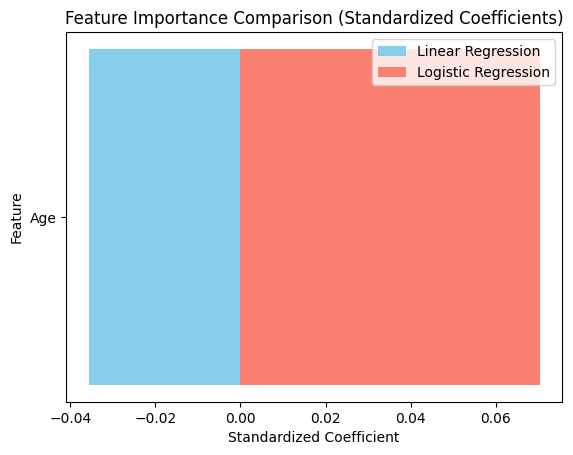

In [ ]:

plt.barh(range(len(standardized_coef_model1)), standardized_coef_model1, align='center', color='skyblue', label='Linear Regression')
plt.barh(range(len(standardized_coef_model2)), standardized_coef_model2, align='center', color='salmon', label='Logistic Regression')
plt.yticks(range(len(x.columns)), x.columns)
plt.xlabel('Standardized Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance Comparison (Standardized Coefficients)')
plt.legend()
plt.show()

- The standardized coefficient of the linear regression model appears in the negative as the line in the graph of the linear regression model also dips. This seems to imply that as the age increases, the monthly revenue is likely to also decrease. In the case of the logistic regression, it also returns a low performing model which has an 18% accuracy rate. Basically, the coefficients (weights) assigned to each feature show how strongly it's related to the log-odds of each class. So, if a feature has higher absolute coefficients, it means it's more significant in predicting the likelihood of a particular class.

Insights

- According to the linear regression model, there is a clear connection between a user's age and their monthly revenue. As a person gets older, they tend to spend less on the platform, which suggests that older users are either not as active as younger users or just don't spend as much. Additionally, it seems that younger users are more likely to have a premium subscription than older users.
- According to the logistic regression model, the type of subscription (basic or premium) is an important factor in predicting whether a user is likely to have a premium subscription. This implies that users with premium subscriptions are more likely to generate higher monthly revenue.
- The probability of a user having a premium subscription could be impacted by the type of device they use, such as a smartphone, laptop, or tablet. Some devices may be related to increased engagement or expenditure patterns, resulting in higher monthly revenue.
- According to the linear regression model, the Monthly Revenue generated by a user may be affected by their country of residence. This is because users from certain countries tend to be more active or spend more on the platform, which can result in higher Monthly Revenue. Additionally, the country of the user may also impact their likelihood of subscribing to premium services, which can also contribute to higher Monthly Revenue.